In [16]:
from meta_processing import *
import matplotlib 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rcParams['font.family'] = 'serif'

In [2]:
# TO DO - SET UP FILE FOR BELOW PARAMS

# directory containing spectra as .d folders (unzipped). Remember to add double \\ in path

# directory = "D:\\charlie HRMS data\\PDRA Ocr23-Jan24 data\\20240123\\4 dC"
# directory = "D:\\WORK\\20230710 DOE_CTB H6_5M_DAmp\\testing"
directory = "D:\\mass spectra\\DoE experiment"

# unzip directory if required - deletes zip file after
unzip_from_dir(directory)

# scan window in TIC
scanstart = 427
scanend = 502

# mass window of deconvolution
masslb = 10000
massub = 17000

# m/z window of spectra to be deconvolved
minmz = 600

# number of iterations of deconvolution algorithm (recommended 50-100)
numit = 100

# charges 
startz = 1
endz = 100
numz = 100

# expected masses
# masslist = [11814, 12488, 12417, 12254]
masslist = [13597.42, 13151.97, 12559.36]



# names of expected masses
# names = ["GGG-CTB", "AYLPETGGG-CTB", "YLPETGGG-CTB", "LPETGGG-CTB"]
names = ["CTB-H6", "CTB-LPETGVSEYG", "CTB-LPET"]

tolerance = 10

Unzipped 240126 DoE Nexp 5_3-1-40_1_8708.zip
Unzipped 240126 DoE Nexp 6_3-1-41_1_8709.zip
Unzipped 240126 DoE Nexp 7_3-1-42_1_8710.zip
Unzipped 240126 DoE Nexp 8_3-1-43_1_8711.zip
Unzipped 240126 DoE Nexp 9_3-1-44_1_8712.zip


In [3]:
# load engine
eng = Meta2()

# extract scans from baf
eng.upload_spectra(directory, scanstart, scanend)

# create hdf5 file
eng.load_hdf5(directory)

# load data to unidec & hdf5 file 
eng.to_unidec()

# set parameters, n.b. further paramters can be set in self.eng.config (## to do - add config file upload)
eng.update_config(massub = massub,
                 masslb = masslb,
                 minmz = minmz,
                 startz = startz,
                 endz = endz, 
                 numz = numz)

# run unidec deconvolution
eng.on_unidec()

# match peaks in deconvolution to expected masses. Background = True finds peaks above noise. 
eng.match_spectra(masslist, names, tolerance, background = True)

# export data to excel 
eng.export_data(export=True)


UniDec Engine v.6.0.4

UniDec Path: C:\Users\cm19ljc\Anaconda3\envs\unidec3\lib\site-packages\unidec\bin\unidec.exe
Specified BAF has 739 spectra with line and profile data.
Specified BAF has 744 spectra with line and profile data.
Specified BAF has 744 spectra with line and profile data.
Specified BAF has 744 spectra with line and profile data.
Specified BAF has 739 spectra with line and profile data.
Specified BAF has 739 spectra with line and profile data.
Specified BAF has 730 spectra with line and profile data.
Specified BAF has 739 spectra with line and profile data.
Specified BAF has 738 spectra with line and profile data.
Adding: 240126 DoE Nexp 1_1-2-33_1_8675.d to ms_dataset
Adding: 240126 DoE Nexp 2_1-2-34_1_8676.d to ms_dataset
Adding: 240126 DoE Nexp 3_1-2-35_1_8677.d to ms_dataset
Adding: 240126 DoE Nexp 4_1-2-36_1_8678.d to ms_dataset
Adding: 240126 DoE Nexp 5_3-1-40_1_8708.d to ms_dataset
Adding: 240126 DoE Nexp 6_3-1-41_1_8709.d to ms_dataset
Adding: 240126 DoE Nexp 7

Name        Height                \
Label                                           CTB-H6      CTB-LPET   
0      240126 DoE Nexp 1_1-2-33_1_8675.d   6741.124512      0.000000   
1      240126 DoE Nexp 2_1-2-34_1_8676.d    441.359222     28.585930   
2      240126 DoE Nexp 3_1-2-35_1_8677.d      0.000000  10422.465820   
3      240126 DoE Nexp 4_1-2-36_1_8678.d    280.619781   1353.995850   
4      240126 DoE Nexp 5_3-1-40_1_8708.d      0.000000   5491.030762   
5      240126 DoE Nexp 6_3-1-41_1_8709.d  11618.871094      0.000000   
6      240126 DoE Nexp 7_3-1-42_1_8710.d   2355.304199   1063.771118   
7      240126 DoE Nexp 8_3-1-43_1_8711.d   3915.061523    173.561646   
8      240126 DoE Nexp 9_3-1-44_1_8712.d      0.000000  17235.302734   

                     Percentage_Labelling                            
Label CTB-LPETGVSEYG               CTB-H6   CTB-LPET CTB-LPETGVSEYG  
0        7818.207520            46.301056   0.000000      53.698944  
1         262.320984            60.273064   3.903763      35.823174  
2        2770.267334             0.000000  79.001564      20.998434  
3       10689.042969             2.277082  10.986963      86.735954  
4       13601.961914             0.000000  28.759405      71.240601  
5       13203.425781            46.808205   0.000000      53.191799  
6       15684.930664            12.328850   5.568315      82.102837  
7       13598.230469            22.135431   0.981303      76.883263  
8        3840.861572             0.000000  81.776276      18.223722

In [4]:
df = eng.export_data(export=False)
df.set_index('Name', inplace = True)
df_pc = df['Percentage_Labelling'].reset_index()
df_pc

Label,Name,CTB-H6,CTB-LPET,CTB-LPETGVSEYG
0,240126 DoE Nexp 1_1-2-33_1_8675.d,46.301056,0.000000,53.698944
1,240126 DoE Nexp 2_1-2-34_1_8676.d,60.273064,3.903763,35.823174
2,240126 DoE Nexp 3_1-2-35_1_8677.d,0.000000,79.001564,20.998434
3,240126 DoE Nexp 4_1-2-36_1_8678.d,2.277082,10.986963,86.735954
4,240126 DoE Nexp 5_3-1-40_1_8708.d,0.000000,28.759405,71.240601
5,240126 DoE Nexp 6_3-1-41_1_8709.d,46.808205,0.000000,53.191799
6,240126 DoE Nexp 7_3-1-42_1_8710.d,12.328850,5.568315,82.102837
7,240126 DoE Nexp 8_3-1-43_1_8711.d,22.135431,0.981303,76.883263
8,240126 DoE Nexp 9_3-1-44_1_8712.d,0.000000,81.776276,18.223722


In [14]:
# fig, axs = plt.subplots(len(eng.eng.data.spectra), 1, sharex=True, sharey = False, constrained_layout=True)

# for i, s in enumerate(eng.eng.data.spectra):
#     axs[i].plot(s.massdat[:, 0], s.massdat[:, 1])
#     axs[i].set_title(s.name)
#     axs[i].spines['right'].set_visible(False)
#     axs[i].spines['top'].set_visible(False)
#     axs[i].spines['left'].set_visible(False)
#     axs[i].yaxis.set_tick_params(labelleft=False)
#     axs[i].set_yticks([])
#     axs[i].grid(False)
    
# fig.supxlabel("Mass [Da]", weight = 'bold', color = 'black')

# # s.name
    

'D:\\mass spectra\\DoE experiment'

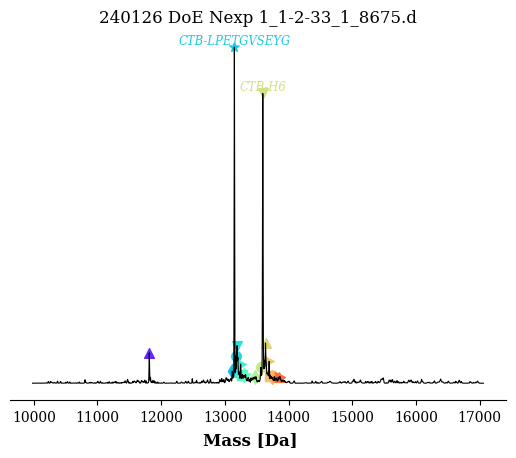

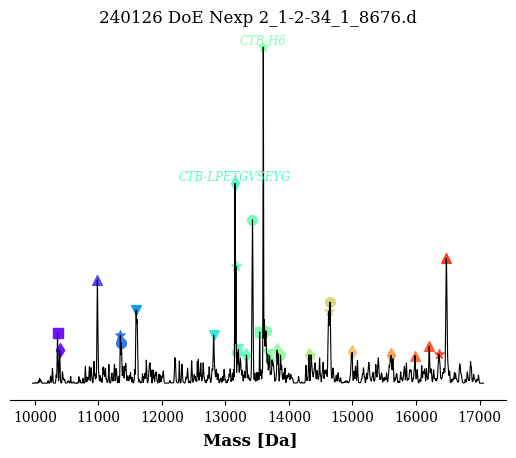

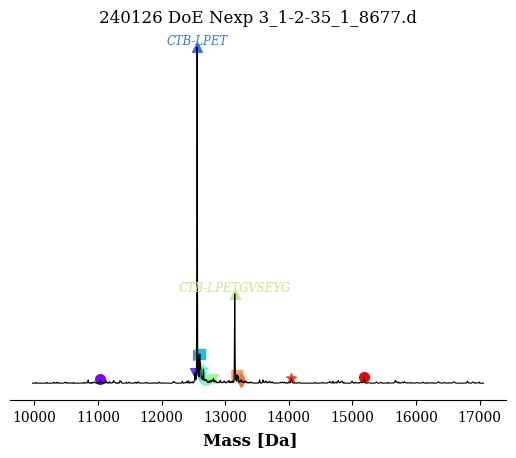

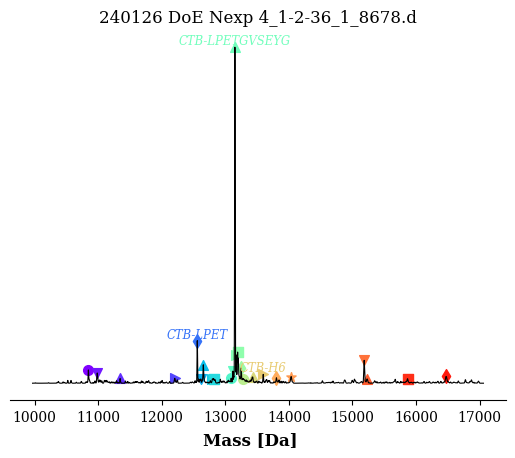

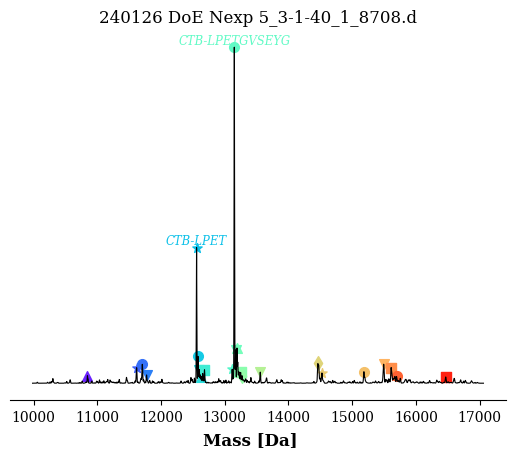

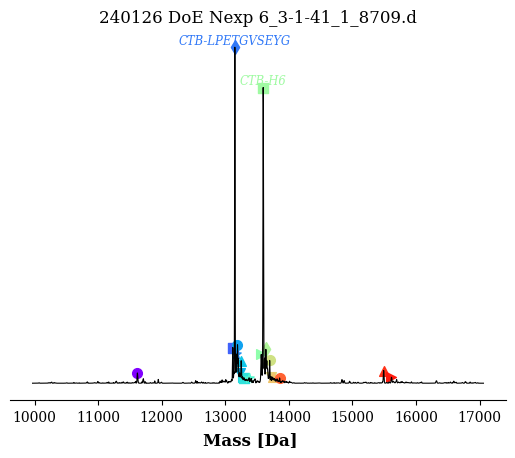

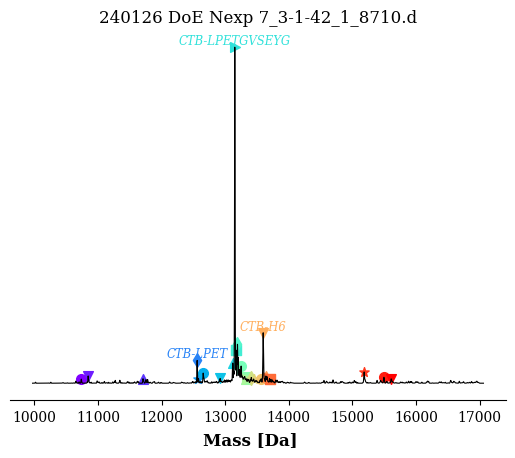

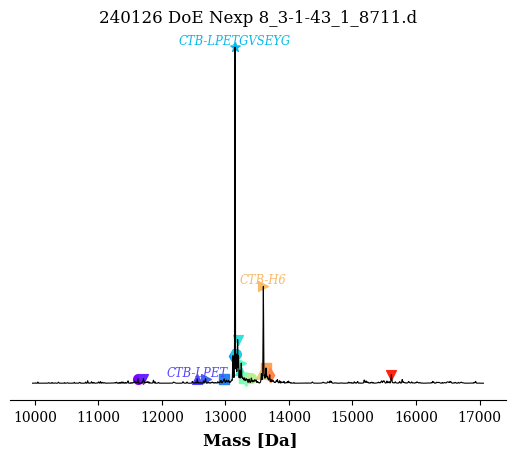

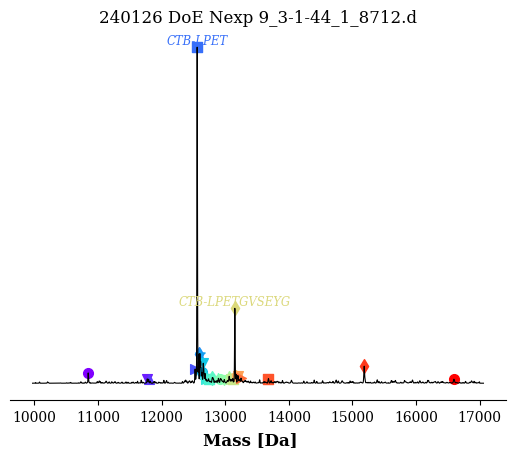

In [159]:
for i, s in enumerate(eng.eng.data.spectra):
    fig, axs = plt.subplots()

    axs.plot(s.massdat[:, 0], s.massdat[:, 1], c = 'black', lw = 0.8)
    axs.set_title(s.name)
    axs.spines['right'].set_visible(False)
    axs.spines['top'].set_visible(False)
    axs.spines['left'].set_visible(False)
    axs.yaxis.set_tick_params(labelleft=False)
    axs.set_yticks([])
    axs.grid(False)
    
    fig.supxlabel("Mass [Da]", weight = 'bold', color = 'black')
    
    
    
    for p in s.pks.peaks:
        if p.height > s.background_threshold:
            axs.scatter(p.mass, p.height, color = p.color, marker = p.marker)
            axs.text(p.mass, p.height, p.label, color = p.color, rotation = 0, ha = "center", va = 'bottom',
                    fontsize = 'small', style = 'italic')
    
#     figpath= os.path.join(eng.directory, "UniDec_Figures_and_Files", s.name+"_img.png")
    
#     plt.savefig(figpath)
    
#     arraypath = os.path.join(eng.directory, "UniDec_Figures_and_Files", s.name+"_massdat.txt")
    
#     np.savetxt(arraypath, s.massdat)
    
eng.directory


In [158]:
p.__dict__

{'mass': 16596.0,
 'height': 204.45143,
 'ccs': 0,
 'centroid': 0,
 'area': 0,
 'color': array([1.0000000e+00, 1.2246468e-16, 6.1232340e-17, 1.0000000e+00]),
 'label': '',
 'marker': 'o',
 'textmarker': '○',
 'ignore': 0,
 'match': 13597.42,
 'matcherror': 2998.58,
 'altmatches': [],
 'altmatcherrors': [],
 'numberalts': 0,
 'integral': 0,
 'integralrange': [],
 'mztab': [],
 'mztab2': [],
 'stickdat': [],
 'kendricknum': 0,
 'kendrickdefect': 0,
 'kmass': 0,
 'score': 0,
 'mztabi': [],
 'massavg': 0,
 'masserr': 0,
 'peakmasses': [],
 'diff': 0,
 'extracts': [],
 'errorFWHM': 0,
 'intervalFWHM': [0, 0],
 'badFWHM': False,
 'errormean': -1,
 'errorreplicate': 0,
 'avgcharge': 0,
 'zstack': [],
 'mzstack': [],
 'mscore': 0,
 'uscore': 0,
 'cs_score': 0,
 'rsquared': 0,
 'fscore': 0,
 'dscore': 0.15094873,
 'lscore': 0,
 'mdist': None,
 'zdist': None,
 'estimatedarea': 0,
 'index': 0,
 'sdnum': 0,
 'sdval': 0,
 'filename': '',
 'filenumber': -1}

In [136]:
s.background_threshold

188.09583

SyntaxError: invalid syntax (1142675036.py, line 1)

In [105]:
def _spectrum_plotter(x,y, title = None, axs = None, fig = None, 
                     xlabel = None, window = [None, None], *args, **kwargs):
    
    if axs is None:
        axs = plt.gca()
    if fig is None and axs is None:
        fig, axs = plt.subplots(subplot_dict)
    

    axs.plot(x, y, *args, **kwargs)
    axs.set_title(title)
    axs.spines['right'].set_visible(False)
    axs.spines['top'].set_visible(False)
    axs.spines['left'].set_visible(False)
    axs.yaxis.set_tick_params(labelleft=False)
    axs.set_yticks([])
    axs.set_xlim(window[0], window[1])  
    axs.grid(False)
    axs.set_xlabel(xlabel, weight = "bold")
    

    return axs

In [101]:
def export_spectrum(fig, name):
    figpath= os.path.join(eng.directory, "UniDec_Figures_and_Files", name+"_img.png")
    
    plt.savefig(figpath)
    print("Fig exported to: ", figpath)

In [106]:
def plot_spectra_separate(spectra, attr = 'massdat', xlabel = 'Mass [Da]', 
                          export = True, window = [None, None],
                          *args, **kwargs):
    """Spectra plotted on individual figure"""
    
    

        
    for i, s in enumerate(spectra):
        fig,axs = plt.subplots()
        
        x, y = getattr(s, attr)[:, 0], getattr(s, attr)[:, 1]
        
        _spectrum_plotter(x, y, xlabel=xlabel, axs = axs, fig=fig,title = s.name, window = window, *args, **kwargs)
        if export:
            export_spectrum(fig, s.name+"_"+attr)
                          
                          
                          
def plot_spectra_combined(spectra, attr = 'massdat', title = "", show_titles = True):
    pass

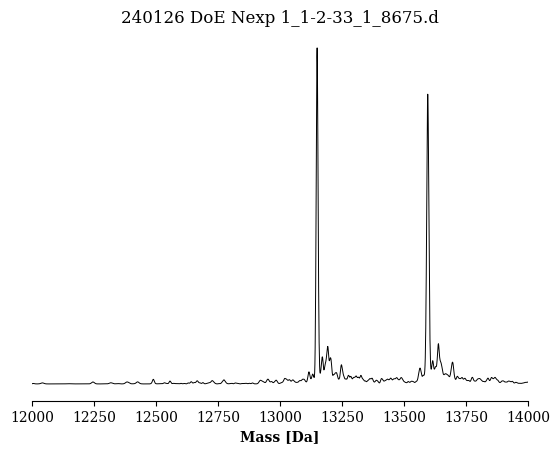

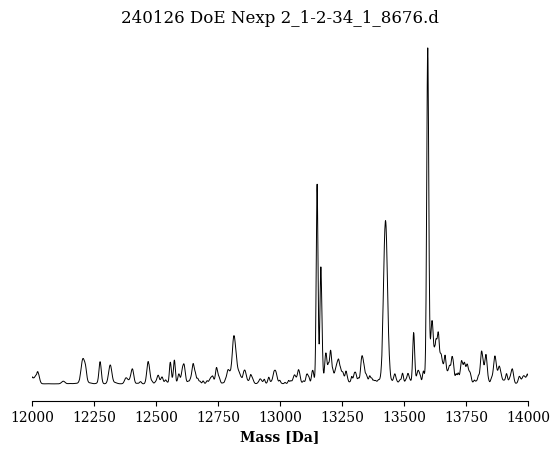

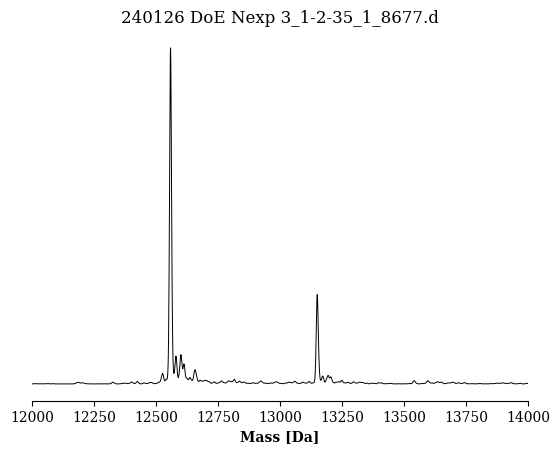

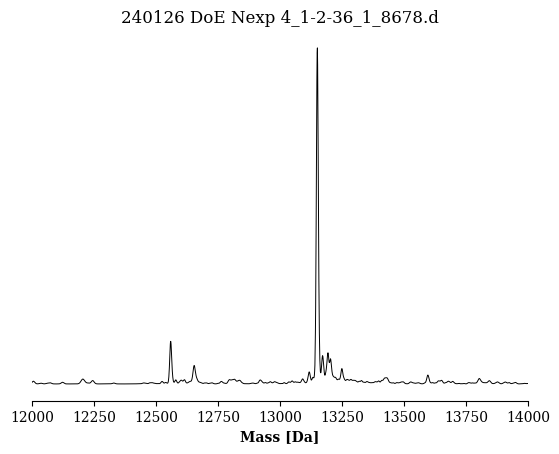

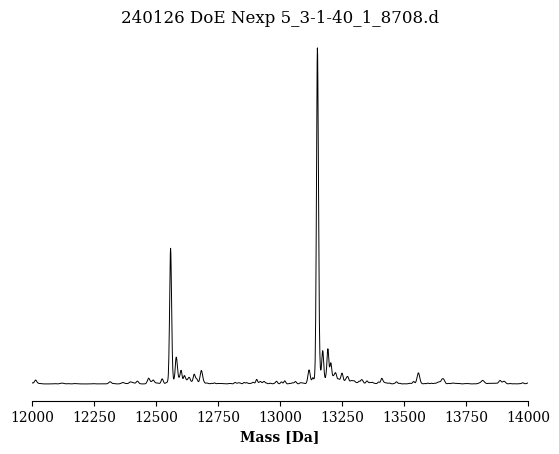

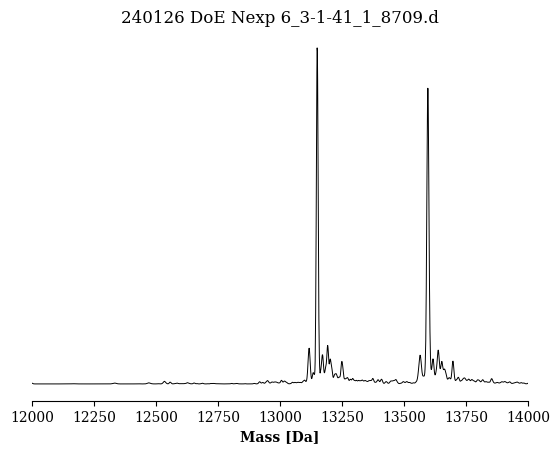

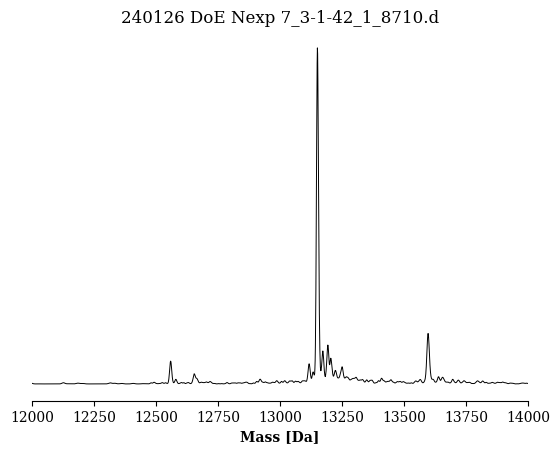

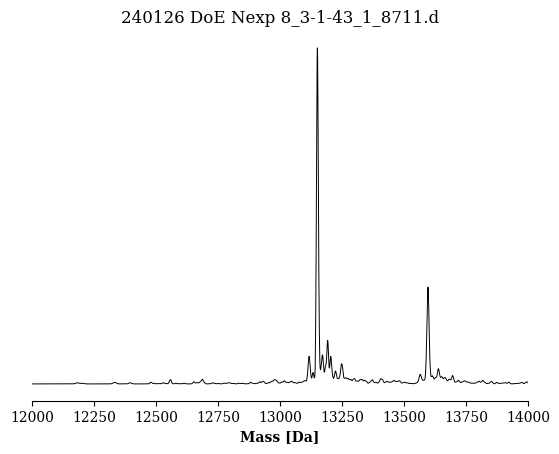

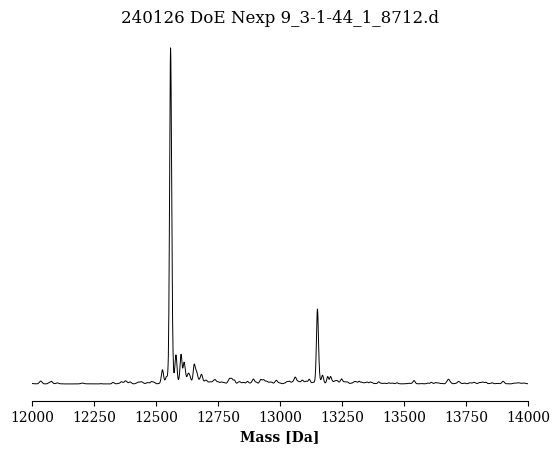

In [114]:
# import ms_plotter_tools as msp

spectra = eng.eng.data.spectra

# add in zoomed function that plots over window using min and max masses contained in masslist 
plot_spectra_separate(spectra, attr = "massdat", xlabel = "Mass [Da]", export=False, c='black',lw=0.7,window=[12000, 14000])

# plot_spectra_separate(spectra, attr = "data2", xlabel = "m/z", export=False)



    

In [8]:
def _set_spectra_colors(spectra, cmap = 'rainbow'):

    cmap = plt.get_cmap(cmap)
    colors = cmap(np.linspace(0, 1, len(spectra)))
    for i, s in enumerate(spectra):
        s.color = colors[i]
        
def get_cmap(length, cmap = 'rainbow', x1 = 0, x2 = 1):

    cmap = plt.get_cmap(cmap)
    return cmap(np.linspace(x1, x2, len(spectra)))

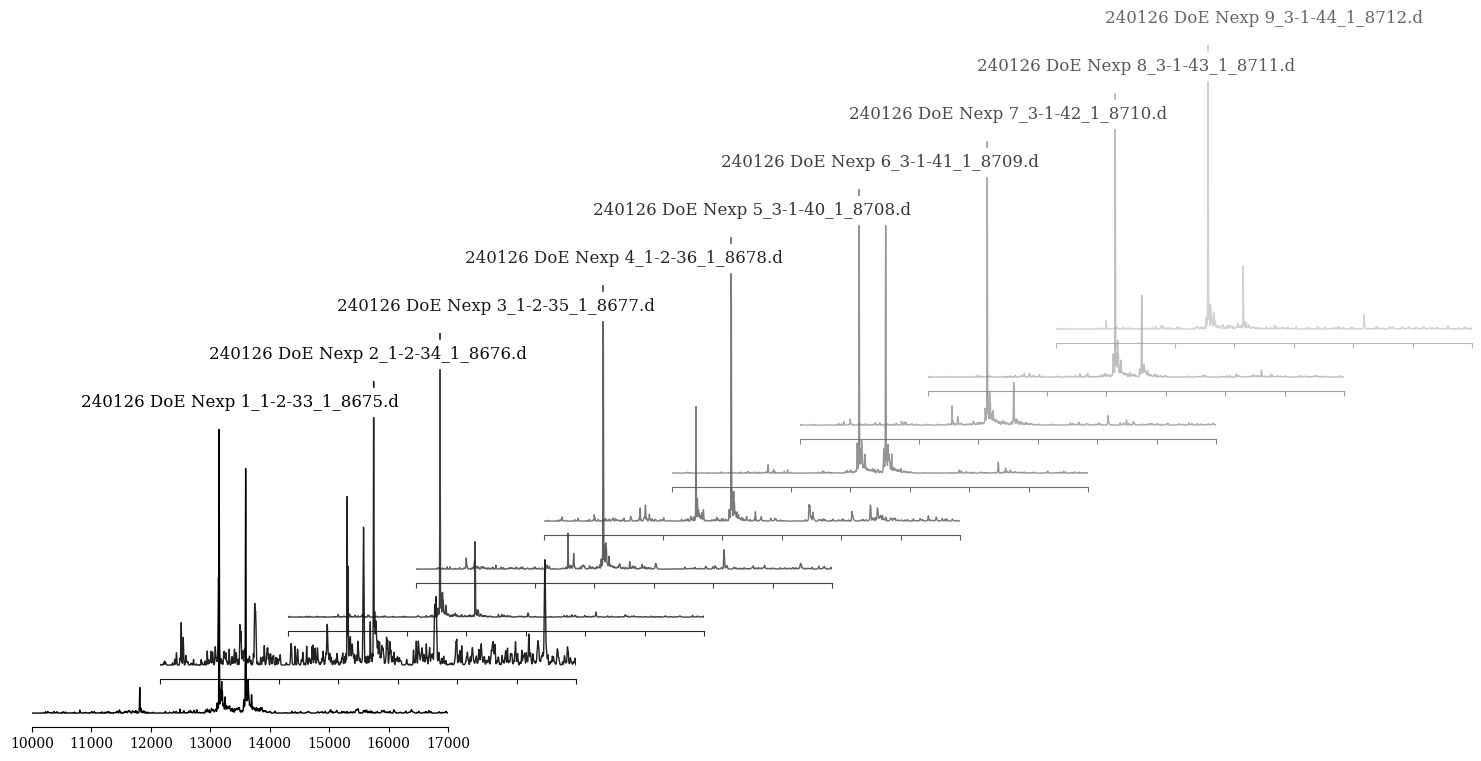

In [113]:
spectra = eng.eng.data.spectra


alpha = np.linspace(1, 0.6, len(spectra))

gray_cmap = get_cmap(len(spectra), cmap = "gray", x1 = 0, x2 = 0.7)

_set_spectra_colors(spectra, cmap ="rainbow" )
fig = plt.figure()

for i,s in enumerate(spectra):
    xoff = i/+5
    yoff= i/10+0.05
    axs=fig.add_axes([xoff,yoff,0.65,0.65], zorder=-i)
    axs.plot(s.massdat[:, 0], s.massdat[:, 1], color = gray_cmap[i], alpha = alpha[i])
    axs.set_title(s.name, alpha = alpha[i], backgroundcolor = 'white')
    axs.spines['right'].set_visible(False)
    axs.spines['top'].set_visible(False)
    axs.spines['left'].set_visible(False)
    axs.yaxis.set_tick_params(labelleft=False, )
    axs.set_yticks([])
    axs.set_clip_on(False)
    axs.grid(False)
    axs.set_xlim(10000, 17000)     
    axs.spines['bottom'].set_color(gray_cmap[i])
    axs.tick_params(axis='x', colors=gray_cmap[i])

#         axs.set_facecolor(None)

    if i != 0:
#             axs.spines['bottom'].set_visible(False)
        axs.xaxis.set_tick_params(labelleft=False)
#             axs.set_xticks([])

#         sns.despine(offset=10)
    axs.patch.set_alpha(0)
        
plt.show()